# **TUGAS BESAR ANALISIS KOMPLEKSITAS ALGORITMA**
# **Nama Kelompok:**

## **1. Diah Intan Nuraini (2311110046)**

## **2. Renna Novaria Widyastuti (2311110047)**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time

In [20]:
df=pd.read_csv('/content/restaurant_customer_satisfaction.csv')
df.head(15)

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,2,5,4,0
1,655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,5,5,3,0
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,3,4,5,0
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,4,5,1,0
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,2,3,5,0
5,659,42,Female,28860,Monthly,111.064696,Chinese,Dinner,8,Celebration,Takeaway,0,1,1,26.853298,4,5,3,0
6,660,20,Female,131104,Weekly,120.236707,Indian,Lunch,6,Business,Dine-in,0,0,0,7.927917,5,4,1,0
7,661,51,Female,137882,Weekly,160.979098,Mexican,Dinner,6,Business,Dine-in,1,1,0,56.447210,4,3,3,0
8,662,27,Male,149638,Weekly,56.558632,Indian,Breakfast,5,Celebration,Takeaway,0,1,0,39.568188,2,4,5,0
9,663,32,Female,136145,Weekly,65.753455,Italian,Lunch,9,Casual,Takeaway,0,0,0,20.782469,4,3,1,0


In [21]:
print(df.info())
print(df.describe())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1500 non-null   int64  
 1   Age                   1500 non-null   int64  
 2   Gender                1500 non-null   object 
 3   Income                1500 non-null   int64  
 4   VisitFrequency        1500 non-null   object 
 5   AverageSpend          1500 non-null   float64
 6   PreferredCuisine      1500 non-null   object 
 7   TimeOfVisit           1500 non-null   object 
 8   GroupSize             1500 non-null   int64  
 9   DiningOccasion        1500 non-null   object 
 10  MealType              1500 non-null   object 
 11  OnlineReservation     1500 non-null   int64  
 12  DeliveryOrder         1500 non-null   int64  
 13  LoyaltyProgramMember  1500 non-null   int64  
 14  WaitTime              1500 non-null   float64
 15  ServiceRating        

In [22]:
# Preprocessing
columns_needed = ["AverageSpend", "WaitTime", "HighSatisfaction"]
df = df[columns_needed]

In [23]:
# Normalisasi df (opsional untuk stabilitas perhitungan)
df["AverageSpend"] = (df["AverageSpend"] - df["AverageSpend"].mean()) / df["AverageSpend"].std()
df["WaitTime"] = (df["WaitTime"] - df["WaitTime"].mean()) / df["WaitTime"].std()

<ipython-input-23-2548a06fd3bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["AverageSpend"] = (df["AverageSpend"] - df["AverageSpend"].mean()) / df["AverageSpend"].std()
<ipython-input-23-2548a06fd3bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["WaitTime"] = (df["WaitTime"] - df["WaitTime"].mean()) / df["WaitTime"].std()


In [24]:
# Fungsi Regresi Linier (Iteratif)
def linear_regression_iterative(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(epochs):
        predictions = X @ theta
        errors = predictions - y
        gradient = (1 / m) * (X.T @ errors)
        theta -= lr * gradient
    return theta

# Fungsi Regresi Linier (Rekursif)
def linear_regression_recursive(X, y, theta, lr, epoch, max_epochs):
    if epoch == max_epochs:
        return theta
    m = len(y)
    predictions = X @ theta
    errors = predictions - y
    gradient = (1 / m) * (X.T @ errors)
    theta -= lr * gradient
    return linear_regression_recursive(X, y, theta, lr, epoch + 1, max_epochs)

In [25]:
# Siapkan Data untuk Model
X_spend = df[["AverageSpend"]].values
X_time = df[["WaitTime"]].values
X_spend = np.c_[np.ones(X_spend.shape[0]), X_spend]  # Tambahkan bias
X_time = np.c_[np.ones(X_time.shape[0]), X_time]  # Tambahkan bias
y = df["HighSatisfaction"].values


In [26]:
# Split data
X_train_spend, X_test_spend, y_train, y_test = train_test_split(X_spend, y, test_size=0.2, random_state=42)
X_train_time, X_test_time, _, _ = train_test_split(X_time, y, test_size=0.2, random_state=42)

In [28]:
# Parameter
learning_rate = 0.01
epochs = 1000

import sys
sys.setrecursionlimit(2000)  # Tingkatkan batas rekursi jika epoch > 1000

# Model 1: Regresi berdasarkan AverageSpend
start_iterative = time.time()
theta_iterative_spend = linear_regression_iterative(X_train_spend, y_train, lr=learning_rate, epochs=epochs)
end_iterative = time.time()

# Untuk model rekursif, kurangi epochs jika perlu
epochs_recursive = min(epochs, 900)  # Pastikan tidak melebihi batas rekursi
start_recursive = time.time()
theta_recursive_spend = linear_regression_recursive(X_train_spend, y_train, np.zeros(X_train_spend.shape[1]), lr=learning_rate, epoch=0, max_epochs=epochs_recursive)
end_recursive = time.time()

# Model 2: Regresi berdasarkan WaitTime
start_iterative_time = time.time()
theta_iterative_time = linear_regression_iterative(X_train_time, y_train, lr=learning_rate, epochs=epochs)
end_iterative_time = time.time()

start_recursive_time = time.time()
theta_recursive_time = linear_regression_recursive(X_train_time, y_train, np.zeros(X_train_time.shape[1]), lr=learning_rate, epoch=0, max_epochs=epochs_recursive)
end_recursive_time = time.time()

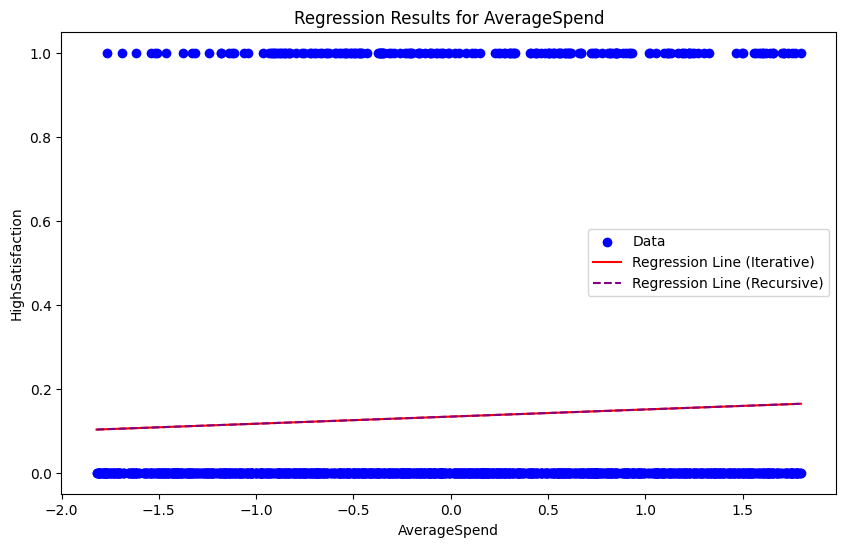

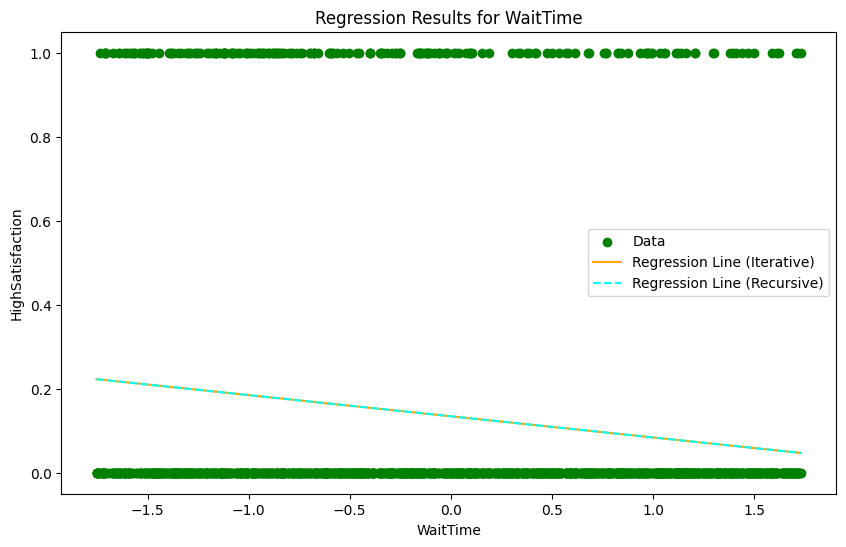

In [32]:
# Grafik Hasil Regresi untuk AverageSpend
plt.figure(figsize=(10, 6))
plt.scatter(df["AverageSpend"], df["HighSatisfaction"], color="blue", label="Data")
x_line = np.linspace(min(df["AverageSpend"]), max(df["AverageSpend"]), 100)

# Garis regresi untuk iterative
y_line_iterative = theta_iterative_spend[0] + theta_iterative_spend[1] * x_line
plt.plot(x_line, y_line_iterative, color="red", label="Regression Line (Iterative)")

# Garis regresi untuk recursive
y_line_recursive = theta_recursive_spend[0] + theta_recursive_spend[1] * x_line
plt.plot(x_line, y_line_recursive, color="purple", linestyle="--", label="Regression Line (Recursive)")

plt.xlabel("AverageSpend")
plt.ylabel("HighSatisfaction")
plt.title("Regression Results for AverageSpend")
plt.legend()
plt.show()

# Grafik Hasil Regresi untuk WaitTime
plt.figure(figsize=(10, 6))
plt.scatter(df["WaitTime"], df["HighSatisfaction"], color="green", label="Data")
x_line = np.linspace(min(df["WaitTime"]), max(df["WaitTime"]), 100)

# Garis regresi untuk iterative
y_line_iterative_time = theta_iterative_time[0] + theta_iterative_time[1] * x_line
plt.plot(x_line, y_line_iterative_time, color="orange", label="Regression Line (Iterative)")

# Garis regresi untuk recursive
y_line_recursive_time = theta_recursive_time[0] + theta_recursive_time[1] * x_line
plt.plot(x_line, y_line_recursive_time, color="cyan", linestyle="--", label="Regression Line (Recursive)")

plt.xlabel("WaitTime")
plt.ylabel("HighSatisfaction")
plt.title("Regression Results for WaitTime")
plt.legend()
plt.show()


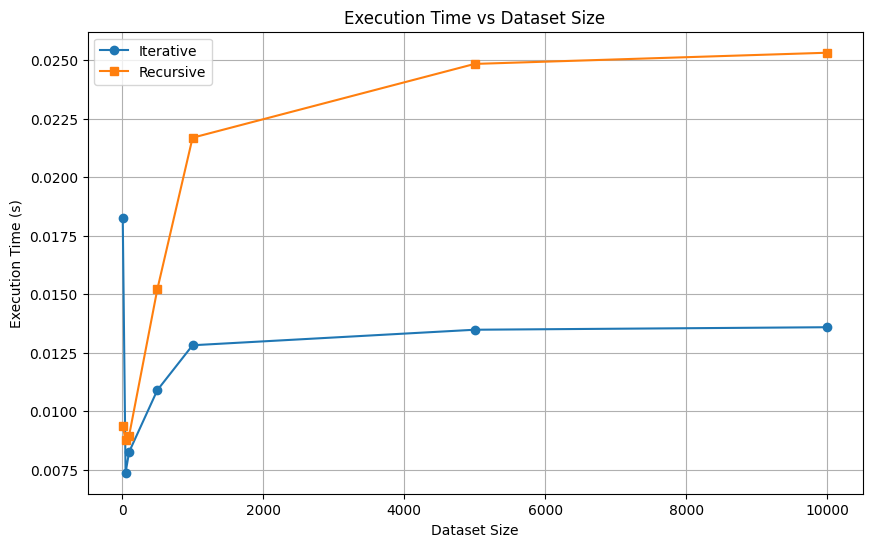


Execution Time for Iterative and Recursive Algorithms:
   Dataset Size  Iterative Time (s)  Recursive Time (s)
0            10            0.018250            0.009362
1            50            0.007376            0.008779
2           100            0.008262            0.008961
3           500            0.010903            0.015210
4          1000            0.012823            0.021693
5          5000            0.013486            0.024847
6         10000            0.013594            0.025325


In [33]:
# Grafik Running Time
sizes = [10, 50, 100, 500, 1000, 5000, 10000]
iterative_times = []
recursive_times = []

for size in sizes:
    subset_X = X_train_spend[:size]
    subset_y = y_train[:size]

    # Execution time for iterative
    start = time.time()
    linear_regression_iterative(subset_X, subset_y, lr=learning_rate, epochs=epochs)
    iterative_times.append(time.time() - start)

    # Execution time for recursive
    start = time.time()
    linear_regression_recursive(subset_X, subset_y, np.zeros(subset_X.shape[1]), lr=learning_rate, epoch=0, max_epochs=epochs)
    recursive_times.append(time.time() - start)

# Plotting Execution Time
plt.figure(figsize=(10, 6))
plt.plot(sizes, iterative_times, label="Iterative", marker='o')
plt.plot(sizes, recursive_times, label="Recursive", marker='s')
plt.xlabel("Dataset Size")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time vs Dataset Size")
plt.legend()
plt.grid()
plt.show()

# Membuat Tabel Execution Time
execution_time_data = {
    "Dataset Size": sizes,
    "Iterative Time (s)": iterative_times,
    "Recursive Time (s)": recursive_times
}

execution_time_table = pd.DataFrame(execution_time_data)

# Menampilkan tabel
print("\nExecution Time for Iterative and Recursive Algorithms:")
print(execution_time_table)


Berdasarkan hasil analisis perbandingan waktu eksekusi antara algoritma iteratif dan rekursif dengan berbagai ukuran dataset, berikut adalah analisis yang lebih mendalam dan kompleks mengenai kedua algoritma ini:

### 1. **Tren Waktu Eksekusi:**
   - **Algoritma Iteratif:**
     - Waktu eksekusi algoritma iteratif meningkat seiring dengan ukuran dataset yang lebih besar, namun penambahan waktu yang terjadi relatif kecil (cenderung konstan) setelah dataset mencapai sekitar 50 sampel.
     - Pada ukuran dataset yang lebih kecil (misalnya 10 atau 50), waktu eksekusi cenderung lebih tinggi, namun pada ukuran dataset lebih besar (1000 hingga 10000), waktu eksekusi mulai stabil sekitar 0.01 detik.
     - Ini menunjukkan bahwa algoritma iteratif memiliki performa yang baik dengan dataset yang lebih besar, namun dapat mengalami sedikit peningkatan dalam waktu eksekusi saat dataset masih kecil.

   - **Algoritma Rekursif:**
     - Algoritma rekursif menunjukkan waktu eksekusi yang lebih rendah pada ukuran dataset kecil (10-50 entri), tetapi cenderung meningkat lebih cepat seiring dengan bertambahnya ukuran dataset.
     - Waktu eksekusi algoritma rekursif lebih tinggi dibandingkan algoritma iteratif pada sebagian besar ukuran dataset yang lebih besar. Untuk dataset dengan ukuran 5000 dan 10000, waktu eksekusinya hampir sama dengan algoritma iteratif (hanya sedikit lebih tinggi).
     - Peningkatan waktu eksekusi yang lebih cepat pada algoritma rekursif menunjukkan bahwa penggunaan rekursi dalam algoritma ini mungkin lebih tidak efisien dibandingkan iterasi langsung, terutama pada dataset yang lebih besar.

### 2. **Perbandingan Efisiensi Algoritma:**
   - **Algoritma Iteratif:**
     - Berdasarkan data waktu eksekusi, algoritma iteratif cenderung lebih efisien saat dataset lebih besar. Hal ini disebabkan oleh struktur algoritma iteratif yang lebih sederhana dan lebih baik dalam menangani iterasi langsung tanpa harus memanggil dirinya sendiri berulang kali.
     - Dalam kasus ini, waktu eksekusi tidak meningkat secara signifikan meskipun ukuran dataset bertambah, yang menandakan bahwa algoritma iteratif memiliki skalabilitas yang lebih baik ketika menangani dataset besar.

   - **Algoritma Rekursif:**
     - Sebaliknya, algoritma rekursif menunjukkan kurang efisien ketika dataset bertambah besar. Panggilan rekursif yang berulang kali cenderung memerlukan overhead tambahan karena setiap panggilan memerlukan alokasi memori baru dan pemrosesan tambahan, yang menyebabkan waktu eksekusi lebih lama.
     - Hal ini mungkin disebabkan oleh fakta bahwa rekursi memerlukan penanganan lebih banyak status dan memori dibandingkan dengan iterasi, yang meningkatkan waktu eksekusi, terutama ketika dataset semakin besar.

### 3. **Implikasi Praktis:**
   - **Dataset Kecil:**
     - Untuk dataset yang relatif kecil (misalnya kurang dari 100 entri), perbedaan antara waktu eksekusi kedua algoritma tidak terlalu signifikan. Kedua algoritma masih dapat dijalankan dalam waktu yang cukup singkat, sehingga pilihan antara keduanya lebih bergantung pada preferensi implementasi atau kemudahan analisis, bukan pada efisiensi.
   
   - **Dataset Besar:**
     - Pada dataset yang lebih besar (misalnya 1000 entri ke atas), algoritma iteratif lebih disarankan karena waktu eksekusinya yang lebih stabil dan tidak meningkat drastis seiring dengan bertambahnya ukuran dataset.
     - Algoritma rekursif, meskipun memiliki keunggulan dalam kesederhanaan implementasi pada beberapa kasus, menunjukkan bahwa efisiensinya lebih rendah pada dataset besar, dan oleh karena itu, bisa lebih lambat jika digunakan untuk masalah dengan data yang lebih besar.

### 4. **Kesimpulan dan Saran:**
   - **Algoritma Iteratif** lebih efisien dan lebih baik skalanya ketika digunakan pada dataset besar, sehingga direkomendasikan untuk digunakan dalam kasus-kasus dengan volume data yang besar.
   - **Algoritma Rekursif** mungkin cocok digunakan untuk kasus-kasus dengan dataset kecil atau masalah yang membutuhkan penyelesaian berbasis pembagian sub-masalah, namun untuk dataset besar, perlu pertimbangan lebih matang mengenai efisiensinya.
   
   Secara umum, untuk memaksimalkan performa model, disarankan untuk memilih algoritma iteratif jika berhadapan dengan data besar atau data yang semakin berkembang.